# Tarefa 4

* Número/Porcentagem de
1. `nan`
2. `null`
3. `inf`
4. "0"
5. "_" (campo vazio)

* Limpeza das linhas (observações)
1. Remover `nan`, `null`, `inf`

* Verificar os tipos
1. Como lidar com a grande quantidade de `object`s?
2. Possíveis erros de formatação provenientes dos datasets

In [1]:
# função que pega um monte de pcaps converte para data frame e os concatenas

import pandas as pd
import nfstream
import os 
import socket
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:

def inicia (mypath):

    lista = []

    for arg in os.listdir(path=mypath):

        if arg.endswith('.pcap'):
            # print(arg)
        
            try:
                # nfstream.NFStreamer(source="pcaps/in1.pcap",statistical_analysis=True).to_csv()
                df = nfstream.NFStreamer(source= os.path.join(mypath, arg),statistical_analysis=True).to_pandas()
                lista.append(df)

            except:
                print("error!")
                exit()
        
    data = pd.concat(lista)

    arg = open('dados.csv','w')
    arg.write(data.to_csv())

    return data

In [4]:
dados = inicia("./pcaps/")

In [5]:
dados.describe()

,id,expiration_id,src_port,dst_port,protocol,ip_version,vlan_id,tunnel_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,...,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed,application_confidence
count,403718.000000,403718.000000,403718.000000,403718.000000,403718.000000,403718.000000,403718.0,403718.000000,4.037180e+05,4.037180e+05,...,403718.000000,403718.0,403718.0,403718.0,403718.000000,403718.000000,403718.000000,403718.000000,403718.000000,403718.000000
mean,23432.155549,0.000285,54159.374506,679.079395,13.176205,4.002264,0.0,0.000015,3.391401e+11,3.391401e+11,...,0.344411,0.0,0.0,0.0,17.097846,3.855186,0.050902,0.343894,0.060396,5.694772
std,19138.616953,0.016875,8649.206287,4986.083937,5.281595,0.067252,0.0,0.006677,6.238569e+11,6.238569e+11,...,0.489646,0.0,0.0,0.0,508.310307,75.850332,0.349173,0.545434,0.238220,1.197617
min,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.0,0.000000,7.392000e+03,1.309900e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7218.000000,0.000000,50878.000000,53.000000,6.000000,4.000000,0.0,0.000000,3.544760e+06,3.566889e+06,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,18216.000000,0.000000,55234.000000,53.000000,17.000000,4.000000,0.0,0.000000,7.910399e+06,7.921857e+06,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,36203.750000,0.000000,59653.000000,80.000000,17.000000,4.000000,0.0,0.000000,1.445989e+07,1.447657e+07,...,1.000000,0.0,0.0,0.0,7.000000,1.000000,0.000000,1.000000,0.000000,6.000000
max,74529.000000,1.000000,65535.000000,65502.000000,58.000000,6.000000,0.0,3.000000,1.493733e+12,1.493733e+12,...,6.000000,0.0,0.0,0.0,238241.000000,34899.000000,46.000000,8.000000,1.000000,6.000000


In [6]:
print(dados)

          id  expiration_id                     src_ip            src_mac  \
0          0              0              192.168.1.111  2c:6e:85:56:dd:b7   
1          1              0              192.168.1.111  2c:6e:85:56:dd:b7   
2          2              0  fe80::6529:a551:88b9:f0ca  2c:6e:85:56:dd:b7   
3          3              0              192.168.1.191  60:6c:66:cb:78:61   
4          4              0              192.168.1.191  60:6c:66:cb:78:61   
...      ...            ...                        ...                ...   
29922  29922              0                  10.0.2.15  08:00:27:a3:83:43   
29923  29923              0                  10.0.2.15  08:00:27:a3:83:43   
29924  29924              0                  10.0.2.15  08:00:27:a3:83:43   
29925  29925              0                  10.0.2.15  08:00:27:a3:83:43   
29926  29926              0                  10.0.2.15  08:00:27:a3:83:43   

        src_oui  src_port           dst_ip            dst_mac   dst_oui  \


In [7]:
print(dados.dtypes)

id                        int64
expiration_id             int64
src_ip                   object
src_mac                  object
src_oui                  object
                          ...  
requested_server_name    object
client_fingerprint       object
server_fingerprint       object
user_agent               object
content_type             object
Length: 86, dtype: object


In [8]:
def is_valid_ip(ip):
    if type(ip) == str:
        try:
            # Tenta criar um socket com o IPv4 e porta fictícias
            socket.inet_pton(socket.AF_INET, ip)
            # Se chegou aqui, é um endereço IPv4 válido
            return True
        except socket.error:
            pass
        try:
            # Tenta criar um socket com o IPv6 e porta fictícias
            socket.inet_pton(socket.AF_INET6, ip)
            # Se chegou aqui, é um endereço IPv6 válido
            return True
        except socket.error:
            pass
        # Se chegou aqui, não é um endereço IPv4 nem IPv6 válido
    return False

UDP          263176
TCP          140140
ICMP            309
IPv6-ICMP        74
IGMP             19
Name: protocol, dtype: int64


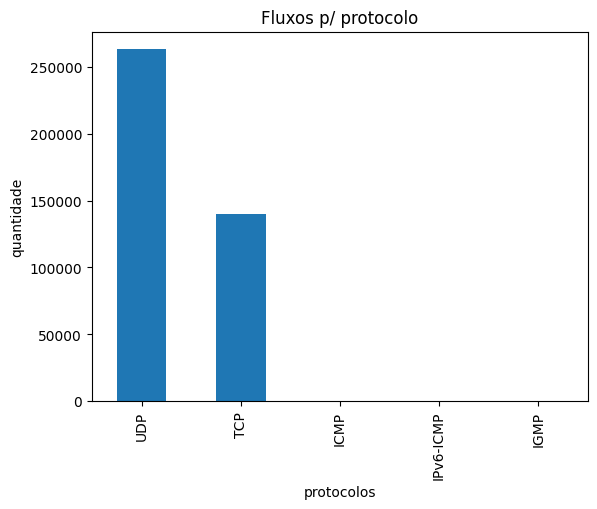

In [9]:
# Quantos fluxos (linhas) existem para cada protocolo?
# a pedido do miane adicionar uma label para para os protocolos no grafico

label_protocol = {1:"ICMP", 2:"IGMP", 6:"TCP", 17:"UDP",58:"IPv6-ICMP"}

# Contar o número de linhas para cada valor na coluna "protocol"
counts = dados['protocol'].map(label_protocol).value_counts()

print(counts)

# Gerar o gráfico de barras
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# Personalizar o gráfico
ax.set_title('Fluxos p/ protocolo')
ax.set_xlabel('protocolos')
ax.set_ylabel('quantidade')

# Mostrar o gráfico
plt.show()

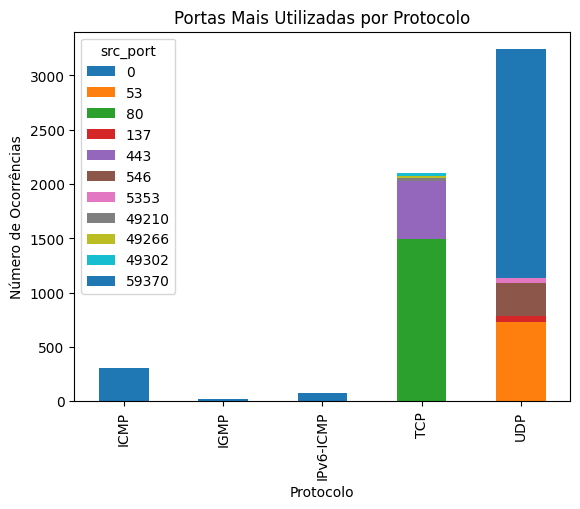

In [10]:
# Contar o número de vezes que cada porta foi usada para cada protocolo
counts = dados.groupby(['protocol', 'src_port']).size().reset_index(name='count')

counts['protocol'] = counts['protocol'].map(label_protocol) 

# Ordenar os dados pela contagem decrescente
counts = counts.sort_values(['protocol', 'count'], ascending=[True, False])

# Selecionar as 3 portas mais utilizadas por cada protocolo
top_ports = counts.groupby('protocol').head()

# Gerar o gráfico de barras empilhadas
fig, ax = plt.subplots()
top_ports.pivot(index='protocol', columns='src_port', values='count').plot(kind='bar', stacked=True, ax=ax)

# Personalizar o gráfico
ax.set_title('Portas Mais Utilizadas por Protocolo')
ax.set_xlabel('Protocolo')
ax.set_ylabel('Número de Ocorrências')

# Mostrar o gráfico
plt.show()

protocol    0
src_port    0
dst_port    0
src_ip      0
dst_ip      0
dtype: int64


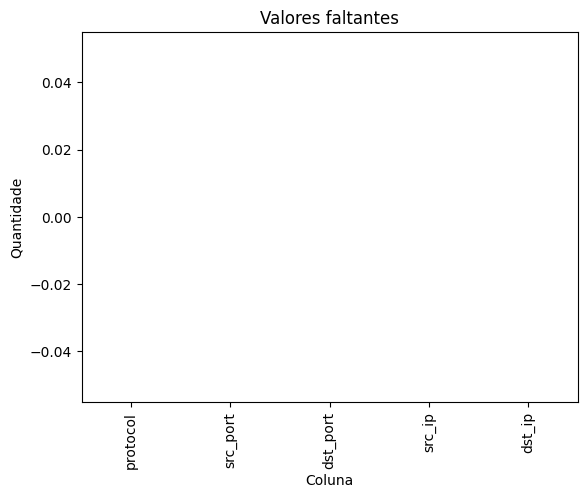

In [19]:
counts = pd.Series({
    'protocol': dados['protocol'].isna().sum(),
    'src_port': dados['src_port'].isna().sum(),
    'dst_port': dados['src_port'].isna().sum(),
    'src_ip': dados['src_ip'].isna().sum(),
    'dst_ip': dados['src_ip'].isin([np.nan, '', 'inf', '-inf']).sum()
})

print(counts)

# Gerar o gráfico de barras
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# Personalizar o gráfico
ax.set_title('Valores faltantes')
ax.set_xlabel('Coluna')
ax.set_ylabel('Quantidade')

# Mostrar o gráfico
plt.show()

protocol    0
src_port    0
dst_port    0
src_ip      0
dst_ip      0
dtype: int64


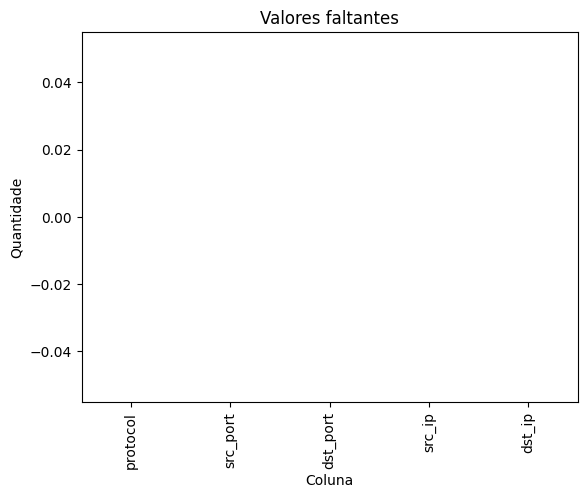

In [12]:
def valid_type_int (item):
    try:
        aux = str(item)
        if str.isdigit(aux):
            return True
    except:
        pass

    return False

counts = pd.Series({
    'protocol': len([item for item in dados['protocol'] if not valid_type_int(item)]),
    'src_port': len([item for item in dados['protocol'] if not valid_type_int(item)]),
    'dst_port': len([item for item in dados['protocol'] if not valid_type_int(item)]),
    'src_ip': dados['src_ip'].isna().sum(),
    'dst_ip': dados['src_ip'].isin([np.nan, '', 'inf', '-inf']).sum()
})

print(counts)

# Gerar o gráfico de barras
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# Personalizar o gráfico
ax.set_title('Valores faltantes')
ax.set_xlabel('Coluna')
ax.set_ylabel('Quantidade')

# Mostrar o gráfico
plt.show()

In [21]:
dados.drop(dados.loc[dados['dst_port'].apply(lambda x: isinstance(x, str) and not x.isnumeric())].index, inplace=True)
dados.drop(dados.loc[dados['src_port'].apply(lambda x: isinstance(x, str) and not x.isnumeric())].index, inplace=True)
dados.drop(dados.loc[dados['protocol'].apply(lambda x: isinstance(x, str) and not x.isnumeric())].index, inplace=True)
dados.drop(dados.loc[dados['dst_ip'].apply(lambda x: not is_valid_ip(x))].index, inplace=True)
dados.drop(dados.loc[dados['src_ip'].apply(lambda x: not is_valid_ip(x))].index, inplace=True)

for item in dados.head():
    dados.drop(dados.loc[dados[item]])
    print(item)

print(dados)

id
expiration_id
src_ip
src_mac
src_oui
src_port
dst_ip
dst_mac
dst_oui
dst_port
protocol
ip_version
vlan_id
tunnel_id
bidirectional_first_seen_ms
bidirectional_last_seen_ms
bidirectional_duration_ms
bidirectional_packets
bidirectional_bytes
src2dst_first_seen_ms
src2dst_last_seen_ms
src2dst_duration_ms
src2dst_packets
src2dst_bytes
dst2src_first_seen_ms
dst2src_last_seen_ms
dst2src_duration_ms
dst2src_packets
dst2src_bytes
bidirectional_min_ps
bidirectional_mean_ps
bidirectional_stddev_ps
bidirectional_max_ps
src2dst_min_ps
src2dst_mean_ps
src2dst_stddev_ps
src2dst_max_ps
dst2src_min_ps
dst2src_mean_ps
dst2src_stddev_ps
dst2src_max_ps
bidirectional_min_piat_ms
bidirectional_mean_piat_ms
bidirectional_stddev_piat_ms
bidirectional_max_piat_ms
src2dst_min_piat_ms
src2dst_mean_piat_ms
src2dst_stddev_piat_ms
src2dst_max_piat_ms
dst2src_min_piat_ms
dst2src_mean_piat_ms
dst2src_stddev_piat_ms
dst2src_max_piat_ms
bidirectional_syn_packets
bidirectional_cwr_packets
bidirectional_ece_packets
bi

In [ ]:
'''
task 5
classificação de trafego em redes domesticas - IOT - mobile - convencional
1 -> criar merge um script que receba um pcap e gera um csv "limpo" - excluir: ip | mac | app * colunas
'''